<a href="https://colab.research.google.com/github/jeet1912/ms/blob/main/cintZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle==1.5.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.0/59.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73026 sha256=99783c52825173da9973383fd1588d74f0952981ce924ea70c3bb6d541d8e958
  Stored in directory: /root/.cache/pip/wheels/70/0c/e6/79103212a102e78b8453691b905f48000219574ba7137e7207
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.17
    Uninstalling kaggle-1.6.17:
      Successfully uninstalled kaggle-1.6.17


In [3]:
!chmod 600 /content/drive/MyDrive/kaggle.json

In [4]:
!pip install docx2txt pandas

  Preparing metadata (setup.py) ... done
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3960 sha256=0e4c3c3dacea27fa208877053accc2f3ce74f45742e7316e6a7412410929862a
  Stored in directory: /root/.cache/pip/wheels/22/58/cf/093d0a6c3ecfdfc5f6ddd5524043b88e59a9a199cb02352966
Successfully built docx2txt


### Packages

In [6]:
import pandas as pd
import docx2txt
from io import StringIO
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import seaborn as sns
import random
import kagglehub
import requests
from bs4 import BeautifulSoup as bs

In [44]:
!rm -rf /root/.cache/kagglehub

#### F1 Dataset

In [45]:
path = kagglehub.dataset_download("rohanrao/formula-1-world-championship-1950-2020")
print('Path ',path)

100%|██████████| 6.14M/6.14M [00:00<00:00, 82.1MB/s]

Extracting files...


Path  /root/.cache/kagglehub/datasets/rohanrao/formula-1-world-championship-1950-2020/versions/23


In [46]:
pitStops = path + '/pit_stops.csv'
fPS = pd.read_csv(pitStops)
fPS.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [47]:
races = path + '/races.csv'
fR = pd.read_csv(races)
fR.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [48]:
f1 = fR.merge(fPS, on='raceId', how='right')
f1.columns

Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time_x', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'driverId',
       'stop', 'lap', 'time_y', 'duration', 'milliseconds'],
      dtype='object')

In [49]:
f1['date'] = pd.to_datetime(f1['date'])
f1['date'] = f1['date'].dt.strftime('%Y-%d-%m')
f1.head()

,raceId,year,round,circuitId,name,date,time_x,url,fp1_date,fp1_time,...,quali_date,quali_time,sprint_date,sprint_time,driverId,stop,lap,time_y,duration,milliseconds
0,841,2011,1,1,Australian Grand Prix,2011-27-03,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,153,1,1,17:05:23,26.898,26898
1,841,2011,1,1,Australian Grand Prix,2011-27-03,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,30,1,1,17:05:52,25.021,25021
2,841,2011,1,1,Australian Grand Prix,2011-27-03,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,17,1,11,17:20:48,23.426,23426
3,841,2011,1,1,Australian Grand Prix,2011-27-03,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,4,1,12,17:22:34,23.251,23251
4,841,2011,1,1,Australian Grand Prix,2011-27-03,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,13,1,13,17:24:10,23.842,23842


In [50]:
startDate = '2011-21-03'
endDate = '2024-14-03'
mask = (f1['date'] >= startDate) & (f1['date'] <= endDate)
f1 = f1.loc[mask]
f1.shape

(10257, 24)

#### Soccer Dataset

In [58]:
path = kagglehub.dataset_download("bryanb/fifa-player-stats-database")

In [62]:
p0 = path + '/FIFA17_official_data.csv'
p1 = path + '/FIFA18_official_data.csv'
p2 = path + '/FIFA19_official_data.csv'
p3 = path + '/FIFA20_official_data.csv'
p4 = path + '/FIFA21_official_data.csv'
p5 = path + '/FIFA22_official_data.csv'
p6 = path + '/FIFA23_official_data.csv'

df0 = pd.read_csv(p0)
df1 = pd.read_csv(p1)
df2 = pd.read_csv(p2)
df3 = pd.read_csv(p3)
df4 = pd.read_csv(p4)
df5 = pd.read_csv(p5)
df6 = pd.read_csv(p6)

print(df0.head())

       ID            Name  Age  \
0  176580       L. Suárez   29   
1  178518   R. Nainggolan   28   
2  181872        A. Vidal   29   
3  197445        D. Alaba   24   
4  195864        P. Pogba   23   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/176/580/17_60.png     Uruguay   
1  https://cdn.sofifa.com/players/178/518/17_60.png     Belgium   
2  https://cdn.sofifa.com/players/181/872/17_60.png       Chile   
3  https://cdn.sofifa.com/players/197/445/17_60.png     Austria   
4  https://cdn.sofifa.com/players/195/864/17_60.png      France   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.com/flags/uy.png       92         92       FC Barcelona   
1  https://cdn.sofifa.com/flags/be.png       86         86               Roma   
2  https://cdn.sofifa.com/flags/cl.png       87         87  FC Bayern München   
3  https://cdn.sofifa.com/flags/at.png       86         89  FC Bayer

In [78]:
dataframes = [df0, df1, df2, df3, df4, df5, df6]
soccer = pd.concat(dataframes, axis=1, ignore_index=True)  # axis=0 for vertical stacking
soccer.head()

,0,1,2,3,4,5,6,7,8,9,...,405,406,407,408,409,410,411,412,413,414
0,176580.0,L. Suárez,29.0,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92.0,92.0,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,178518.0,R. Nainggolan,28.0,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86.0,86.0,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,181872.0,A. Vidal,29.0,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87.0,87.0,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,197445.0,D. Alaba,24.0,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86.0,89.0,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,195864.0,P. Pogba,23.0,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88.0,94.0,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


#### Cricket Dataset

In [54]:
path = kagglehub.dataset_download("subhrajyotinath/match-info-and-ball-by-ball-data-for-odis")

100%|██████████| 5.13M/5.13M [00:00<00:00, 130MB/s]

Extracting files...


In [56]:
p7 = path + '/ball_by_ball_data.csv'

defi = pd.read_csv(p7)
defi.head()

<ipython-input-56-4bd1c30f0f73>:3: DtypeWarning: Columns (15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  dfe = pd.read_csv(p7)


,Match ID,Inning Team,Over,Batter,Bowler,Non-striker,Runs by Batter,Extras,Total Runs,Wicket Kind,...,Review By,Umpire,Review Decision,Review Type,Replacement In,Replacement Out,Replacement Team,Replacement Reason,Replacement Role,Current Wickets
0,1034819,England,0,JJ Roy,UT Yadav,AD Hales,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1034819,England,0,JJ Roy,UT Yadav,AD Hales,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1034819,England,0,JJ Roy,UT Yadav,AD Hales,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1034819,England,0,JJ Roy,UT Yadav,AD Hales,4,0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1034819,England,0,JJ Roy,UT Yadav,AD Hales,0,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Preprocessing data

In [ ]:
genData = docx2txt.process('/content/drive/MyDrive/dm634/generatedUsingGrok.docx')
print(type(genData))
print(genData[:50])

df = pd.read_csv(StringIO(genData),sep=',')
print(df.head())
print(df.shape)

<class 'str'>
X (Seconds),Y (Hours),Z (Minutes)

0,0,0

10,0,20

   X (Seconds)  Y (Hours)  Z (Minutes)
0            0          0            0
1           10          0           20
2           15          1           30
3           20          2           15
4           30          3           45
(539, 3)


### Data Vizualization

In [ ]:
df.head()

,X (Seconds),Y (Hours),Z (Minutes)
0,0,0,0
1,10,0,20
2,15,1,30
3,20,2,15
4,30,3,45


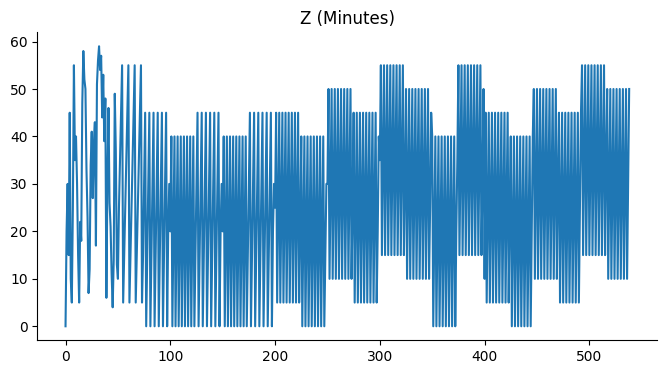

In [ ]:
# @title Z (Minutes)

from matplotlib import pyplot as plt
df['Z (Minutes)'].plot(kind='line', figsize=(8, 4), title='Z (Minutes)')
plt.gca().spines[['top', 'right']].set_visible(False)

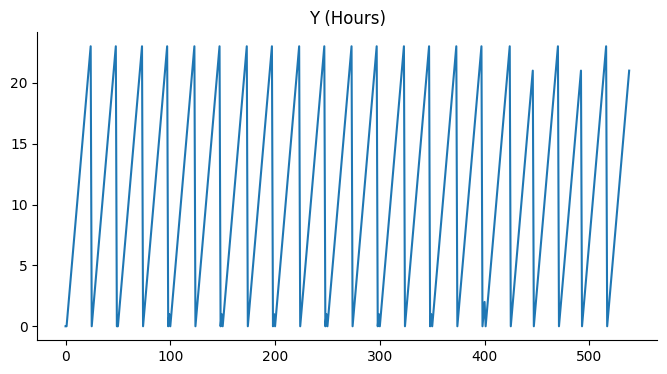

In [ ]:
# @title Y (Hours)

from matplotlib import pyplot as plt
df['Y (Hours)'].plot(kind='line', figsize=(8, 4), title='Y (Hours)')
plt.gca().spines[['top', 'right']].set_visible(False)

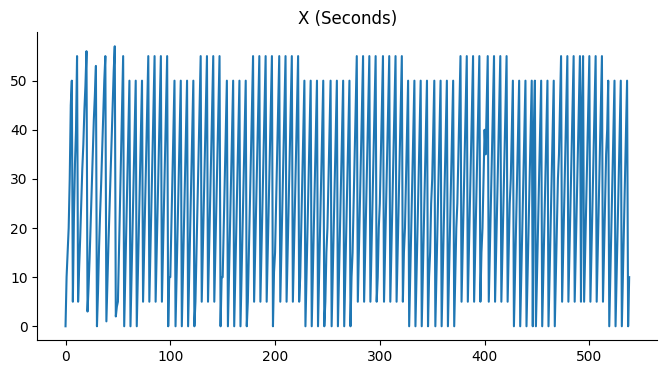

In [ ]:
# @title X (Seconds)

from matplotlib import pyplot as plt
df['X (Seconds)'].plot(kind='line', figsize=(8, 4), title='X (Seconds)')
plt.gca().spines[['top', 'right']].set_visible(False)

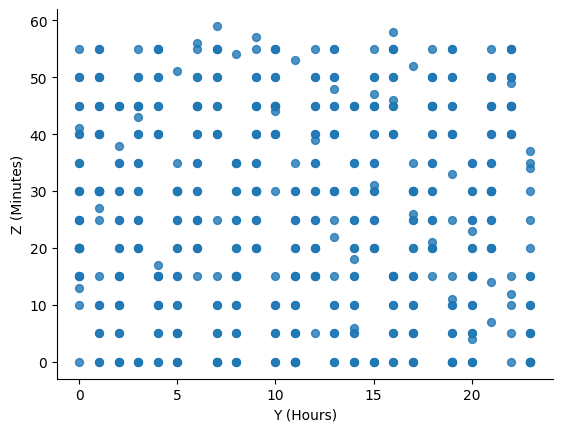

In [ ]:
# @title Y (Hours) vs Z (Minutes)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Y (Hours)', y='Z (Minutes)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

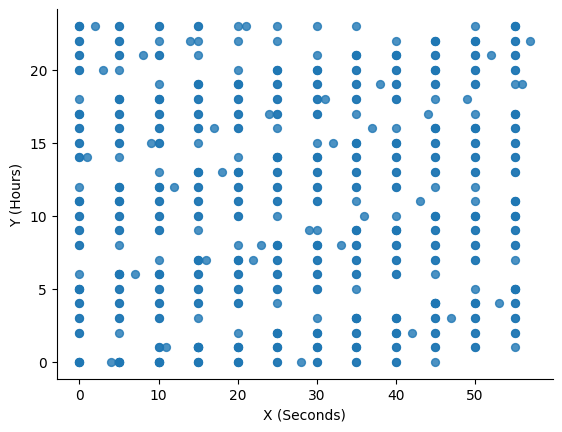

In [ ]:
# @title X (Seconds) vs Y (Hours)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='X (Seconds)', y='Y (Hours)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

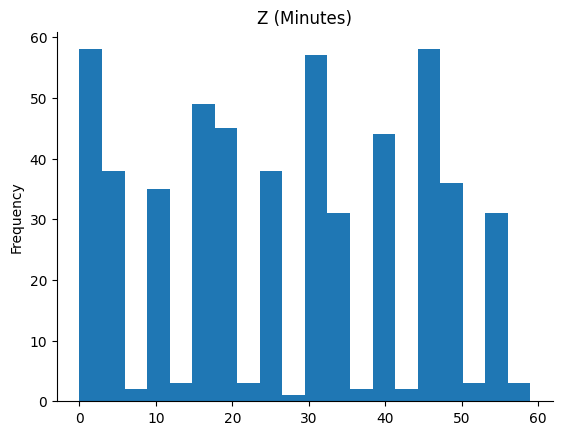

In [ ]:
# @title Z (Minutes)

from matplotlib import pyplot as plt
df['Z (Minutes)'].plot(kind='hist', bins=20, title='Z (Minutes)')
plt.gca().spines[['top', 'right',]].set_visible(False)

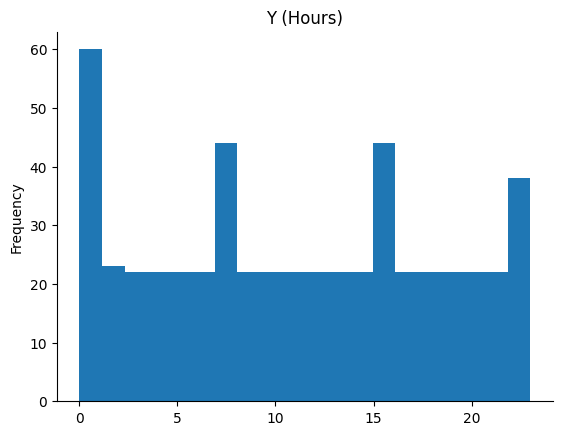

In [ ]:
# @title Y (Hours)

from matplotlib import pyplot as plt
df['Y (Hours)'].plot(kind='hist', bins=20, title='Y (Hours)')
plt.gca().spines[['top', 'right',]].set_visible(False)

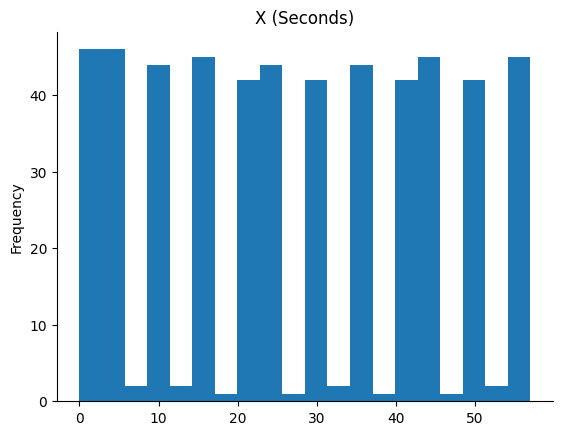

In [ ]:
# @title X (Seconds)

from matplotlib import pyplot as plt
df['X (Seconds)'].plot(kind='hist', bins=20, title='X (Seconds)')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

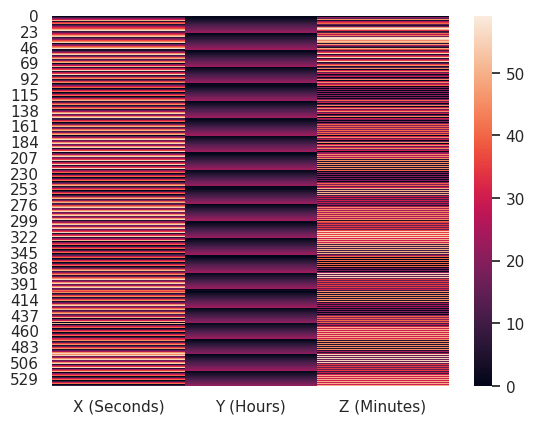

In [ ]:
sns.set_theme(style="whitegrid")
sns.heatmap(df)

In [ ]:
fig = go.Figure(data=[go.Surface(z=df.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True), contours_x=dict(show=True, usecolormap=True,
                                  highlightcolor="pink", project_x=True), )
fig.update_layout(title='Surface Plot', autosize=False,
                  scene_camera_eye=dict(y=2.87,z=-0.64,x=-1),
                  width=1000, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

### Second dataset

In [ ]:
df2 = df.copy()
df2['Z (Minutes)'] = df2['Y (Hours)']*60 + df2['X (Seconds)']/60

In [ ]:


fig = go.Figure(data=[go.Surface(z=df2.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen",project_z=True))
fig.update_layout(title='Surface Plot', autosize=False,
                  scene_camera_eye=dict(y=2.87,z=-0.64,x=1),
                  width=1000, height=500,
                  margin=dict(l=65, r=50, b=65, t=90)
)

fig.show()

In [ ]:
df2.head()

,X (Seconds),Y (Hours),Z (Minutes)
0,0,0,0.000000
1,10,0,0.166667
2,15,1,60.250000
3,20,2,120.333333
4,30,3,180.500000


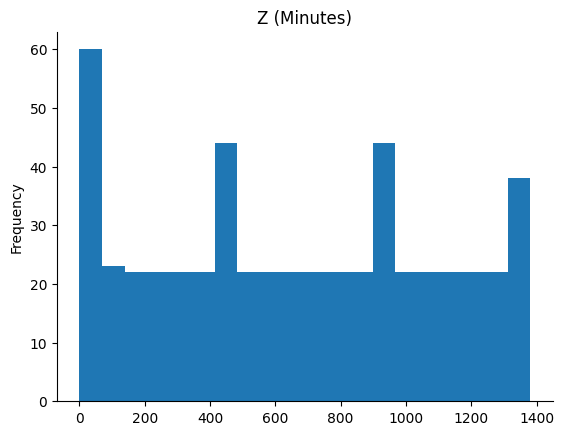

In [ ]:
# @title Z (Minutes)

from matplotlib import pyplot as plt
df2['Z (Minutes)'].plot(kind='hist', bins=20, title='Z (Minutes)')
plt.gca().spines[['top', 'right',]].set_visible(False)

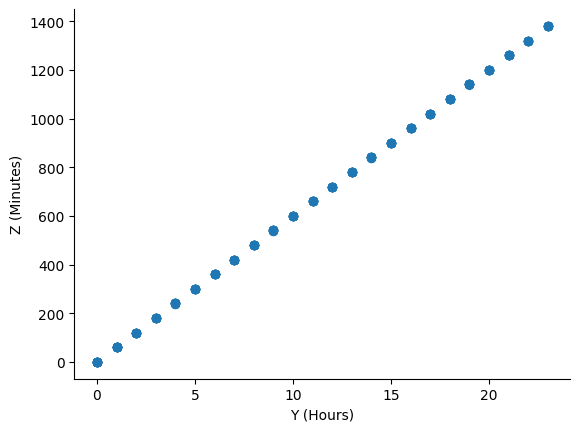

In [ ]:
# @title Y (Hours) vs Z (Minutes)

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='Y (Hours)', y='Z (Minutes)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

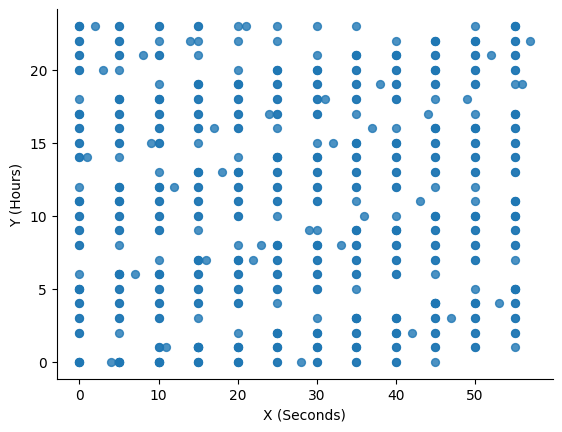

In [ ]:
# @title X (Seconds) vs Y (Hours)

from matplotlib import pyplot as plt
df2.plot(kind='scatter', x='X (Seconds)', y='Y (Hours)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

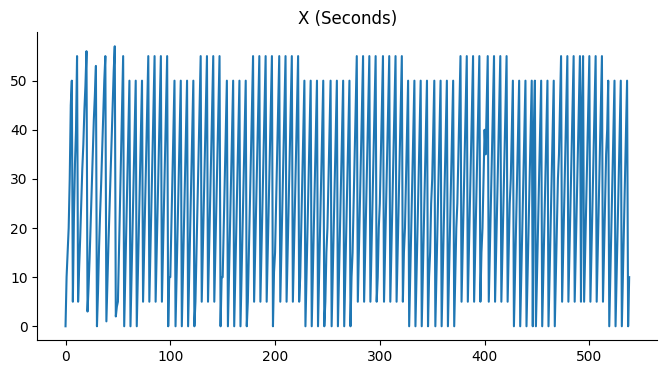

In [ ]:
# @title X (Seconds)

from matplotlib import pyplot as plt
df2['X (Seconds)'].plot(kind='line', figsize=(8, 4), title='X (Seconds)')
plt.gca().spines[['top', 'right']].set_visible(False)

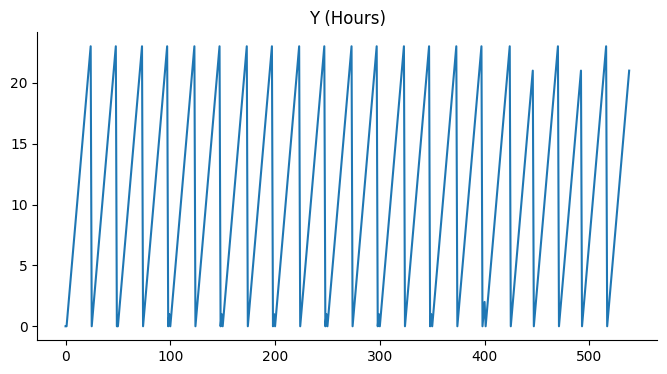

In [ ]:
# @title Y (Hours)

from matplotlib import pyplot as plt
df2['Y (Hours)'].plot(kind='line', figsize=(8, 4), title='Y (Hours)')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

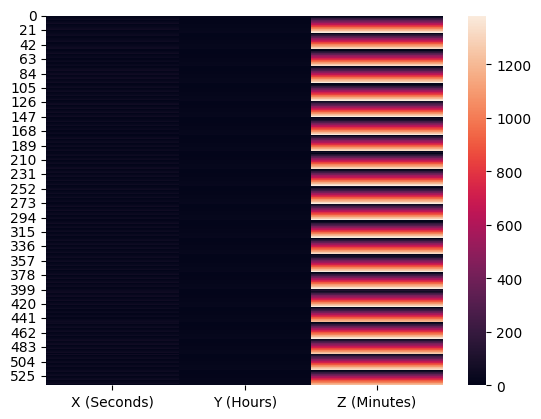

In [ ]:
sns.heatmap(df2)

In [ ]:
x = df['X (Seconds)'].to_list()
y = df['Y (Hours)'].to_list()
z = df['Z (Minutes)'].to_list()
fig = go.Figure(data=[go.Mesh3d(x=x, y=y, z=z, color='lightpink', opacity=0.50,)], layout=go.Layout(scene=dict(xaxis_title='X (Seconds)', yaxis_title='Y (Hours)', zaxis_title='Z (Minutes)')))
fig.show()

### Removing outliers using Euclidean Distances

In [ ]:
df.describe()

,X (Seconds),Y (Hours),Z (Minutes)
count,539.000000,539.000000,539.000000
mean,27.298701,11.031540,26.773655
std,17.390171,7.019154,17.203591
min,0.000000,0.000000,0.000000
25%,10.000000,5.000000,13.500000
50%,25.000000,11.000000,25.000000
75%,42.500000,17.000000,40.000000
max,57.000000,23.000000,59.000000


In [ ]:
def euclideanDistance(a, b):
  distance = np.sqrt(np.sum((a - b)**2))
  return distance

def arrayDistances(data):
  distances = set()
  for i in range(len(data)):
      for j in range(i+1, len(data)):
        distance = euclideanDistance(data[i], data[j])
        distances.add(distance)
  return [np.array(distance) for distance in distances]

def calculateIQR(data):
  q1, q3 = np.percentile(data, [25, 75])
  iqr = q3 - q1
  return iqr

def removeOutliers(data):
  outliersSet = set()
  distances = arrayDistances(data)
  q1, q3 = np.percentile(distances, [25, 75])
  iqr = q3 - q1
  lowerBound = q1 - 1.5 * iqr
  upperBound = q3 + 1.5 * iqr
  for i in range(len(data)):
    for j in range(i+1, len(data)):
      distance = euclideanDistance(data[i], data[j])
      if distance < lowerBound or distance > upperBound:
        outliersSet.add(tuple(data[i]))
        outliersSet.add(tuple(data[j]))
  return outliersSet

#### Dataset 1

In [ ]:
dataArray = df.to_numpy()
distances = arrayDistances(dataArray)
fig = go.Figure(data=[go.Box(x=distances)])
fig.show()

In [ ]:
print(calculateIQR(distances))

24.556671441748193


In [ ]:
outliers = removeOutliers(dataArray)
print(len(outliers))

0


#### Dataset 2

In [ ]:
dataArray = df2.to_numpy()
distances = arrayDistances(dataArray)
fig = go.Figure(data=[go.Box(x=distances)])
fig.show()

In [ ]:
print(calculateIQR(distances))

600.6010023387444


In [ ]:
outliers = removeOutliers(dataArray)
print(len(outliers))

0


There are no outliers in the generated datasets.

### Random package for reproducibility

In [ ]:
np.random.seed(33)

In [ ]:
def selectRandomVectors(data, k):
  selectedVectors = []
  selectedIndices = set()
  while len(selectedVectors) < k:
      randomIndex = random.randint(0, len(data) - 1)
      if randomIndex not in selectedIndices:
        selectedVectors.append(data[randomIndex])
        selectedIndices.add(randomIndex)
  return selectedVectors

# Example usage:
data = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]
k = 3

random_tuples = selectRandomVectors(data, k)
print(random_tuples)

[(5, 6), (3, 4), (1, 2)]


### K means Clustering

In [ ]:
def kmeans(data, k, max_iterations=100):
  random.seed(33)
  centroids = selectRandomVectors(data,k) #random initialization
  for _ in range(max_iterations):
    clusters = [[] for _ in range(k)]

    # assigning tuples to nearest centroid
    for point in data:
      distances = [euclideanDistance(point, centroid) for centroid in centroids]
      clusterAssignment = distances.index(min(distances))
      clusters[clusterAssignment].append(point)

    # update centroids if a cluster is edited during the assignment loop
    newCentroids = []
    for cluster in clusters:
      if cluster:
        newCentroid = [sum(coord) / len(cluster) for coord in zip(*cluster)]
        newCentroids.append(newCentroid)
      else:
        newCentroids.append(centroids[clusters.index(cluster)])

    # convergence check
    if np.array_equal(np.array(centroids), np.array(newCentroids)):
      break

    centroids = newCentroids

  # assignLabels
  clusterLabels = []
  for point in data:
    distances = [euclideanDistance(point, centroid) for centroid in centroids]
    clusterLabels.append(distances.index(min(distances)))

  return clusterLabels


In [ ]:
for k in range(2, 7):
  for dataframe in [df, df2]:
    clusterLabels = kmeans(dataframe.to_numpy(), k)
    dataframe[f'{k} clusters'] = clusterLabels

In [ ]:
df.head()
df.to_csv('/content/drive/MyDrive/dm634/df.csv', index=True)

In [ ]:
df2.head()
df2.to_csv('/content/drive/MyDrive/dm634/df2.csv', index=True)

#### Note : Cluster indexes are set at random, however, monitoring the number of vectors belonging to each cluster ensures uniformity.  

### Hierarchial Agglomerative Clustering

### Comparision based on Silhouette Values